In [1]:
# Imporing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing CSV file
df = pd.read_csv('restaurant_dataset.csv')

In [3]:
# Brief info of csv file
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      5000 non-null   int64  
 1   name               5000 non-null   object 
 2   city               5000 non-null   object 
 3   cuisine            5000 non-null   object 
 4   rating             5000 non-null   float64
 5   votes              5000 non-null   int64  
 6   cost_for_two       5000 non-null   int64  
 7   delivery_time      5000 non-null   int64  
 8   is_veg             5000 non-null   int64  
 9   discount_percent   5000 non-null   int64  
 10  order_count_month  5000 non-null   int64  
 11  latitude           5000 non-null   float64
 12  longitude          5000 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


,restaurant_id,rating,votes,cost_for_two,delivery_time,is_veg,discount_percent,order_count_month,latitude,longitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,3.745320,2481.753600,823.156400,37.353400,0.287400,12.462000,1000.756000,20.812542,80.665056
std,1443.520003,0.728184,1435.168324,386.562671,12.946522,0.452595,12.604377,566.494542,4.625757,4.491293
min,1.000000,2.500000,10.000000,150.000000,15.000000,0.000000,0.000000,20.000000,12.803230,72.801455
25%,1250.750000,3.100000,1232.000000,496.000000,26.000000,0.000000,0.000000,508.000000,16.875906,76.739236
50%,2500.500000,3.700000,2477.000000,813.000000,38.000000,0.000000,10.000000,983.000000,20.758755,80.790998
75%,3750.250000,4.400000,3688.500000,1154.000000,49.000000,1.000000,20.000000,1489.250000,24.857372,84.515133
max,5000.000000,5.000000,4998.000000,1499.000000,59.000000,1.000000,40.000000,1999.000000,28.690913,88.397020


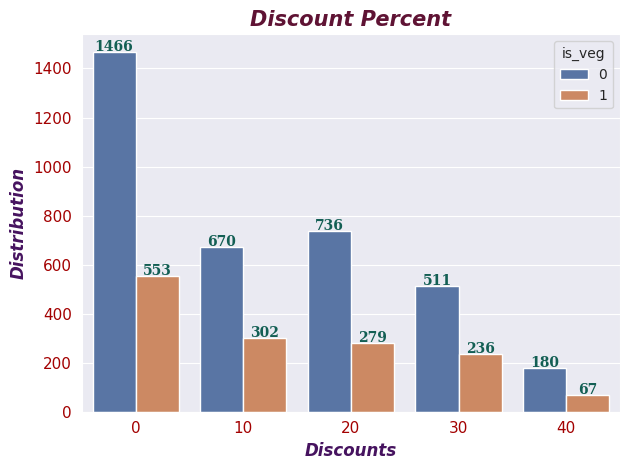

In [11]:
# Page Theme
sns.set_style('darkgrid')

# Countplot
ax = sns.countplot(x='discount_percent',data=df,hue='is_veg',palette='deep')

# Annotation
df['discount_percent'].mean()
for i in ax.patches:
    height = i.get_height()
    if height>0:
        plt.text(i.get_x()+i.get_width()/2,height+4,round(height),ha='center',fontweight='bold',fontfamily='Serif',color='#135F54')

# Styling Title , labels and ticks
plt.title('Discount Percent',fontweight='bold',fontstyle='oblique',fontsize=15,color='#5F1334')
plt.xlabel('Discounts',fontsize=12,fontstyle='oblique',color='#46135F',fontweight='bold')
plt.ylabel('Distribution',fontsize=12,fontstyle='oblique',color='#46135F',fontweight='bold')
plt.tick_params(axis='both',labelcolor='#A30101',labelsize=11)

# Page layout
plt.tight_layout()
plt.show()

# Countplot
# 0% discount restaurants dominate the dataset, with the highest count by a huge margin.
# Restaurants offering 10–40% discounts are much fewer compared to the 0% group.
# No restaurants offer discounts above 40%, indicating very limited high-discount promotions.
# Veg vs Non-Veg restaurants show no major difference in discount pattern — both follow the same distribution trend.

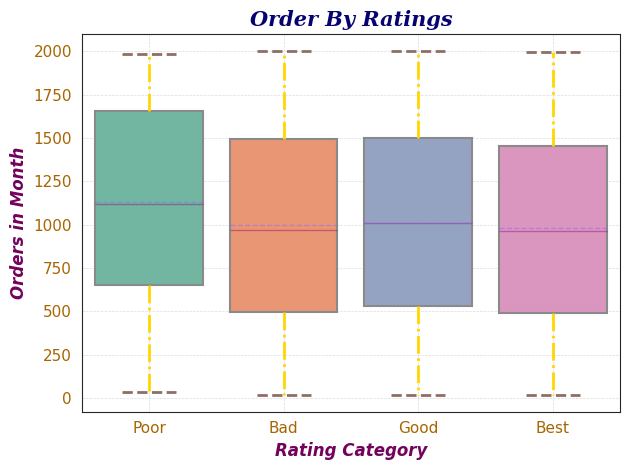

In [16]:
# Page Theme
sns.set_style('white')

# Feature Enginering
b = [0,2.5,3.8,4.5,5]
l = ['Poor','Bad','Good','Best']
df['Rating_Status'] = pd.cut(df['rating'],bins=b,labels=l)

# Boxplot
ax = sns.boxplot(x='Rating_Status',y='order_count_month',data=df,hue='Rating_Status',palette='Set2',showmeans='true',meanline=True,
           patch_artist=True,boxprops={'edgecolor':'#8A8A8A','linewidth':1.5},
           whiskerprops={'color':'gold','linewidth':2,'linestyle':'-.'},
           capprops={'color':'#8D6F64','linewidth':2,'linestyle':'--'},
           meanprops={'color':'#8869FC','alpha':0.5},
           medianprops={'color':'#940159','alpha':0.4})

# Styling Title , labels and ticks
plt.title('Order By Ratings',fontweight='bold',fontstyle='oblique',fontsize=15,color='#060270',fontfamily='Serif')
plt.xlabel('Rating Category',fontweight='bold',fontstyle='italic',fontsize=12,color='#73025C')
plt.ylabel('Orders in Month',fontweight='bold',fontstyle='italic',fontsize=12,color='#73025C')
plt.tick_params(axis='both',labelcolor='#A76501',labelsize=11)

# Page layout
plt.grid(alpha=0.7,linewidth=0.5,linestyle='--')
plt.tight_layout()
plt.show()

# Boxplot
# Best rating restaurants have the highest median monthly orders — not Poor.
# Orders increase as ratings improve (Poor -> Bad -> Good -> Best).
# Poor-rated restaurants show the widest variability — kuch orders bohot low, kuch randomly high.
# Good & Best categories are stable, meaning higher-rated restaurants attract more consistent demand.
# Overall, rating strongly influences order volume = better ratings = more orders

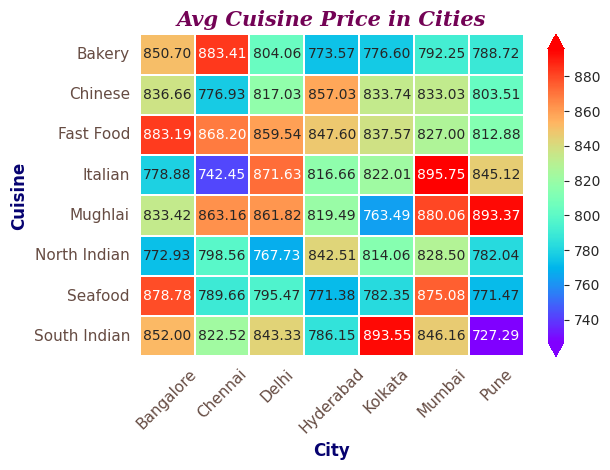

In [18]:
# Pivot Table
cost = pd.pivot_table(data=df,index='cuisine',columns='city',values='cost_for_two',aggfunc='mean')

# Heatmap
c= {'shrink':1,'extend':'both'}
sns.heatmap(cost,annot=True,fmt='.2f',cmap='rainbow',linewidth=0.3,cbar_kws=c)

# Styling Title , labels and ticks
plt.title('Avg Cuisine Price in Cities',fontweight='bold',fontstyle='oblique',fontsize=15,color='#730255',fontfamily='Serif')
plt.xlabel('City',fontweight='bold',fontsize=12,color='#060270')
plt.ylabel('Cuisine',fontweight='bold',fontsize=12,color='#060270')
plt.tick_params(axis='both',labelcolor='#664C43',labelsize=11)
plt.xticks(rotation=45)

# Styling Title , labels and ticks
plt.tight_layout()
plt.show()

# Heatmap
# Fast Food and Mughlai are generally the most expensive cuisines across most cities.
# Italian and Bakery items stay on the cheaper side compared to others.
# Hyderabad and Kolkata show slightly lower average prices for many cuisines.
# Mumbai, Chennai, and Delhi tend to have higher prices, especially for Italian and Mughlai.
# Overall, price patterns vary by city, not by cuisine alone, meaning location plays a big role in pricing.

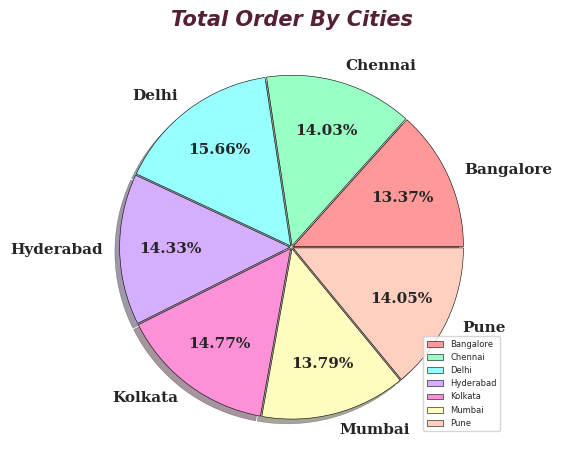

In [22]:
# Grouping By city
orders = df.groupby('city')['order_count_month'].sum().reset_index()

# Pie Chart
e = [0.01 for i in orders['city']]
c = ['#FF9898','#98FFC5','#98FFFF','#D5AEFF','#FD91D7','#FFFCBF','#FFD0BF']
plt.pie(orders['order_count_month'],autopct='%.2f%%',explode=e,shadow=True,colors=c,labels=orders['city'],labeldistance=1.1,pctdistance=0.7,
        wedgeprops=dict(edgecolor='k',linewidth=0.4),textprops=dict(size=11,fontweight='bold',fontfamily='Serif'))

# Styling Title , labels and ticks
plt.title('Total Order By Cities',fontweight='bold',fontstyle='oblique',fontsize=15,color='#551F36')
plt.legend(fontsize=6,bbox_to_anchor=(0.8,0.3))

# Page Layout
plt.tight_layout()
plt.show()

# Pie Chart
# Delhi has the highest share of total orders (15.66%), showing stronger demand in the city.
# Kolkata, Hyderabad, and Pune are also close, with all above 14%, meaning mid-tier cities bhi strong perform kar rahe.
# Bangalore and Mumbai have the lowest shares (~13.4–13.8%), but difference bohot kam hai — overall demand almost evenly distributed lagti hai.
# No city dominates heavily, which suggests customer orders are balanced across locations.

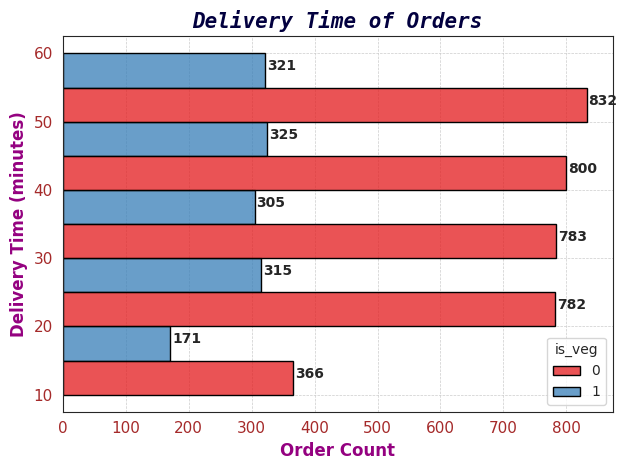

In [28]:
# Hisplot
b = [10,20,30,40,50,60]
ax = sns.histplot(y='delivery_time',data=df,bins=b,hue='is_veg',multiple='dodge',palette='Set1',edgecolor='k')

# Annotation
for i in ax.patches:
    width = i.get_width()
    plt.text(width+3,i.get_y()+i.get_height()/2,width,fontweight='bold')

# Styling Title , labels and ticks
plt.title('Delivery Time of Orders',fontweight='bold',fontstyle='oblique',fontfamily='monospace',fontsize=15,color='#02003F')
plt.xlabel('Order Count',fontweight='bold',fontsize=12,color='#940180')
plt.ylabel('Delivery Time (minutes)',fontweight='bold',fontsize=12,color='#940180')

# Page Layout
plt.grid(linestyle='--',linewidth=0.5)
plt.tick_params(axis='both',labelcolor='brown',labelsize=11)
plt.tight_layout()

# Histplot
# Non-veg orders clearly dominate and also take longer delivery times at every interval.
# Overall, most deliveries happen in the 40–60 minute range, showing this is the busiest window.

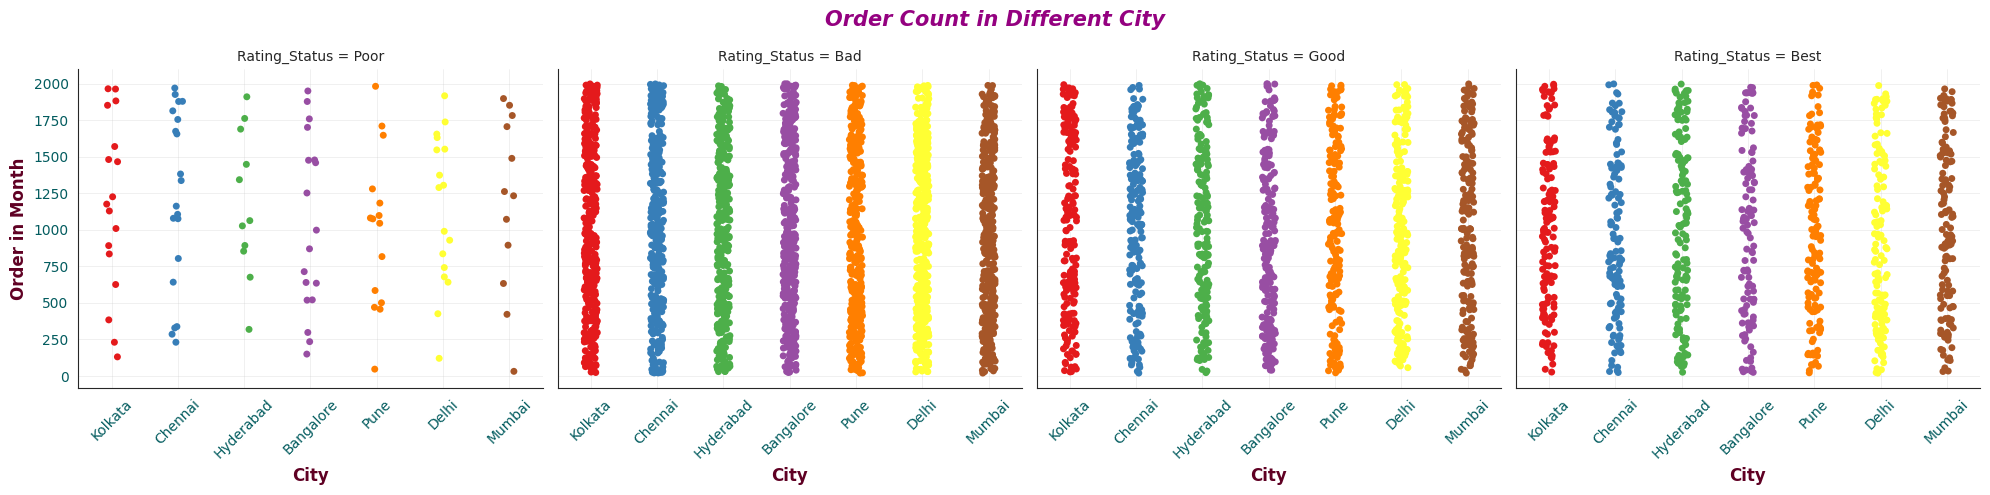

In [32]:
# Page Theme
sns.set_style('white')

# Catplot
ax = sns.catplot(x='city',y='order_count_month',data=df,col='Rating_Status',hue='city',palette='Set1',sharex=True,sharey=True)

# Annotation
for i in ax.axes.flat:
    i.grid(linewidth=0.4,alpha=0.5)
    i.tick_params(axis='x',rotation=45)
    i.tick_params(axis='both',labelcolor='#035C5F')
    i.set_xlabel('City',fontweight='bold',fontsize=12,color='#5F0023')
    i.set_ylabel('Order in Month',fontweight='bold',fontsize=12,color='#5F0023')

# Styling Title
plt.suptitle('Order Count in Different City',fontweight='bold',fontsize=15,color='#940180',fontstyle='oblique')
plt.subplots_adjust(top=0.85)

# Page Layout
plt.tight_layout()
plt.show()

# Catplot
# Orders remain consistently high across all cities regardless of the rating category, showing stable customer activity.
# However, cities like Bangalore, Delhi, and Mumbai show slightly denser order clusters, indicating stronger demand in every rating segment.

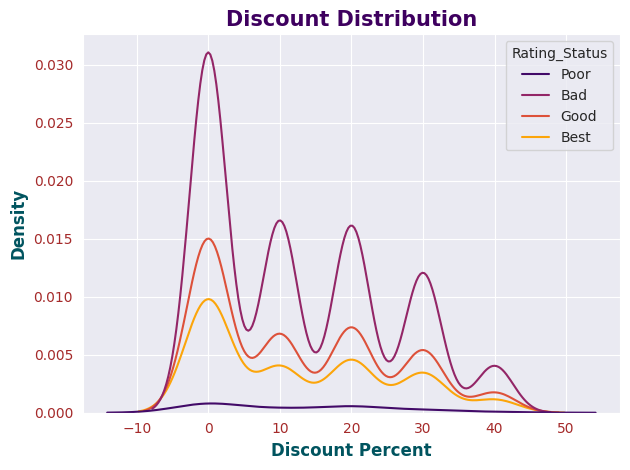

In [36]:
# Page Theme
sns.set_style('darkgrid')

# KDE Plot
sns.kdeplot(x='discount_percent',data=df,hue='Rating_Status',palette='inferno')

# Styling titles ,labels and ticks
plt.title('Discount Distribution',fontweight='bold',fontsize=15,color='#3E005F')
plt.xlabel('Discount Percent',fontweight='bold',fontsize=12,color='#00545F')
plt.ylabel('Density',fontweight='bold',fontsize=12,color='#00545F')
plt.tick_params(axis='both',labelcolor='brown')

# Page Layout
plt.tight_layout()
plt.show()

# Lower-rated restaurants rely heavily on discounts, especially between 0–20%, while high-rated ones hardly depend on them.
# Discount patterns become more stable and consistent as the restaurant rating improves

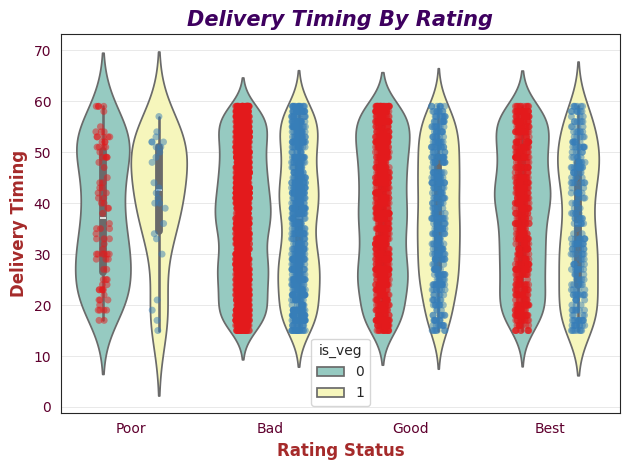

In [40]:
# Page Theme
sns.set_style('white')

# Violin + Strip
sns.violinplot(x='Rating_Status',y='delivery_time',data=df,hue='is_veg',palette='Set3',cut=2)
sns.stripplot(x='Rating_Status',y='delivery_time',data=df,hue='is_veg',palette='Set1',jitter=True,dodge=True,alpha=0.5,legend=False)

# Styling titles ,labels and ticks
plt.title('Delivery Timing By Rating',fontweight='bold',fontsize=15,color='#3E005F',fontstyle='oblique')
plt.xlabel('Rating Status',fontweight='bold',fontsize=12,color='brown')
plt.ylabel('Delivery Timing',fontweight='bold',fontsize=12,color='brown')
plt.tick_params(axis='both',labelcolor='#5F002E')

# Page layout
plt.grid(axis='y',alpha=0.6,linewidth=0.5)
plt.tight_layout()
plt.show()

# Violin + Strip
# Poor-rated restaurants show the largest variability in delivery time — some deliveries are very fast while others are very slow.
# Veg orders are tighter (more consistent) and centered around a lower median than non-veg.
# As rating improves (Bad → Good → Best), delivery times become more consistent — Best restaurants show the narrowest spread.
# Non-veg tends to have a wider spread and slightly higher median delivery time, indicating prep/time variability.

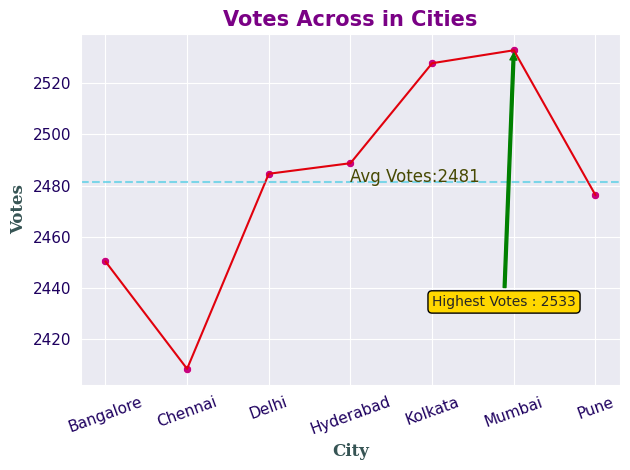

In [45]:
# Page Theme
sns.set_style('darkgrid')

# Grouping By cites
avg_rat = df.groupby('city')['votes'].mean().reset_index()

# Line + Scatter
sns.lineplot(x='city',y='votes',data=avg_rat,color='#E1010D')
sns.scatterplot(x='city',y='votes',data=avg_rat,color='#C7037F')

# Annotation
a = avg_rat['votes'].argmax()
b = avg_rat.loc[a,'votes']
plt.annotate(f'Highest Votes : {round(b)}',xy=(a,b),xytext=(a-1,b-100),arrowprops=dict(arrowstyle='simple',color='green'),
            bbox=dict(boxstyle='round',facecolor='gold',edgecolor='k'))
avg = avg_rat['votes'].mean()
plt.axhline(avg,color='#4CCDE4',linestyle='--',alpha=0.7)
plt.text(x=3,y=avg,s=f'Avg Votes:{round(avg)}',fontsize=12,color='#474903')

# Styling titles ,labels and ticks
plt.title('Votes Across in Cities',fontweight='bold',fontsize=15,color='#7A0185')
plt.xlabel('City',fontweight='bold',fontsize=12,color='#365454',fontfamily='Serif')
plt.ylabel('Votes',fontweight='bold',fontsize=12,color='#365454',fontfamily='Serif')
plt.xticks(rotation=20)
plt.tick_params(axis='both',labelcolor='#1E005F',labelsize=11)

# Page Layout
plt.tight_layout()
plt.show()

# Line and Scatterplot
# Cities show fairly similar vote levels overall, but Mumbai clearly leads with the highest engagement.
# Chennai sits at the lower end, while most other cities hover close to the average, showing balanced interest across regions